# Домашняя работа 2.
# Эсаулов Илья,
# М06-108ск,
# Цифровые технологии в бизнесе,
# Магистратура 1 курс.

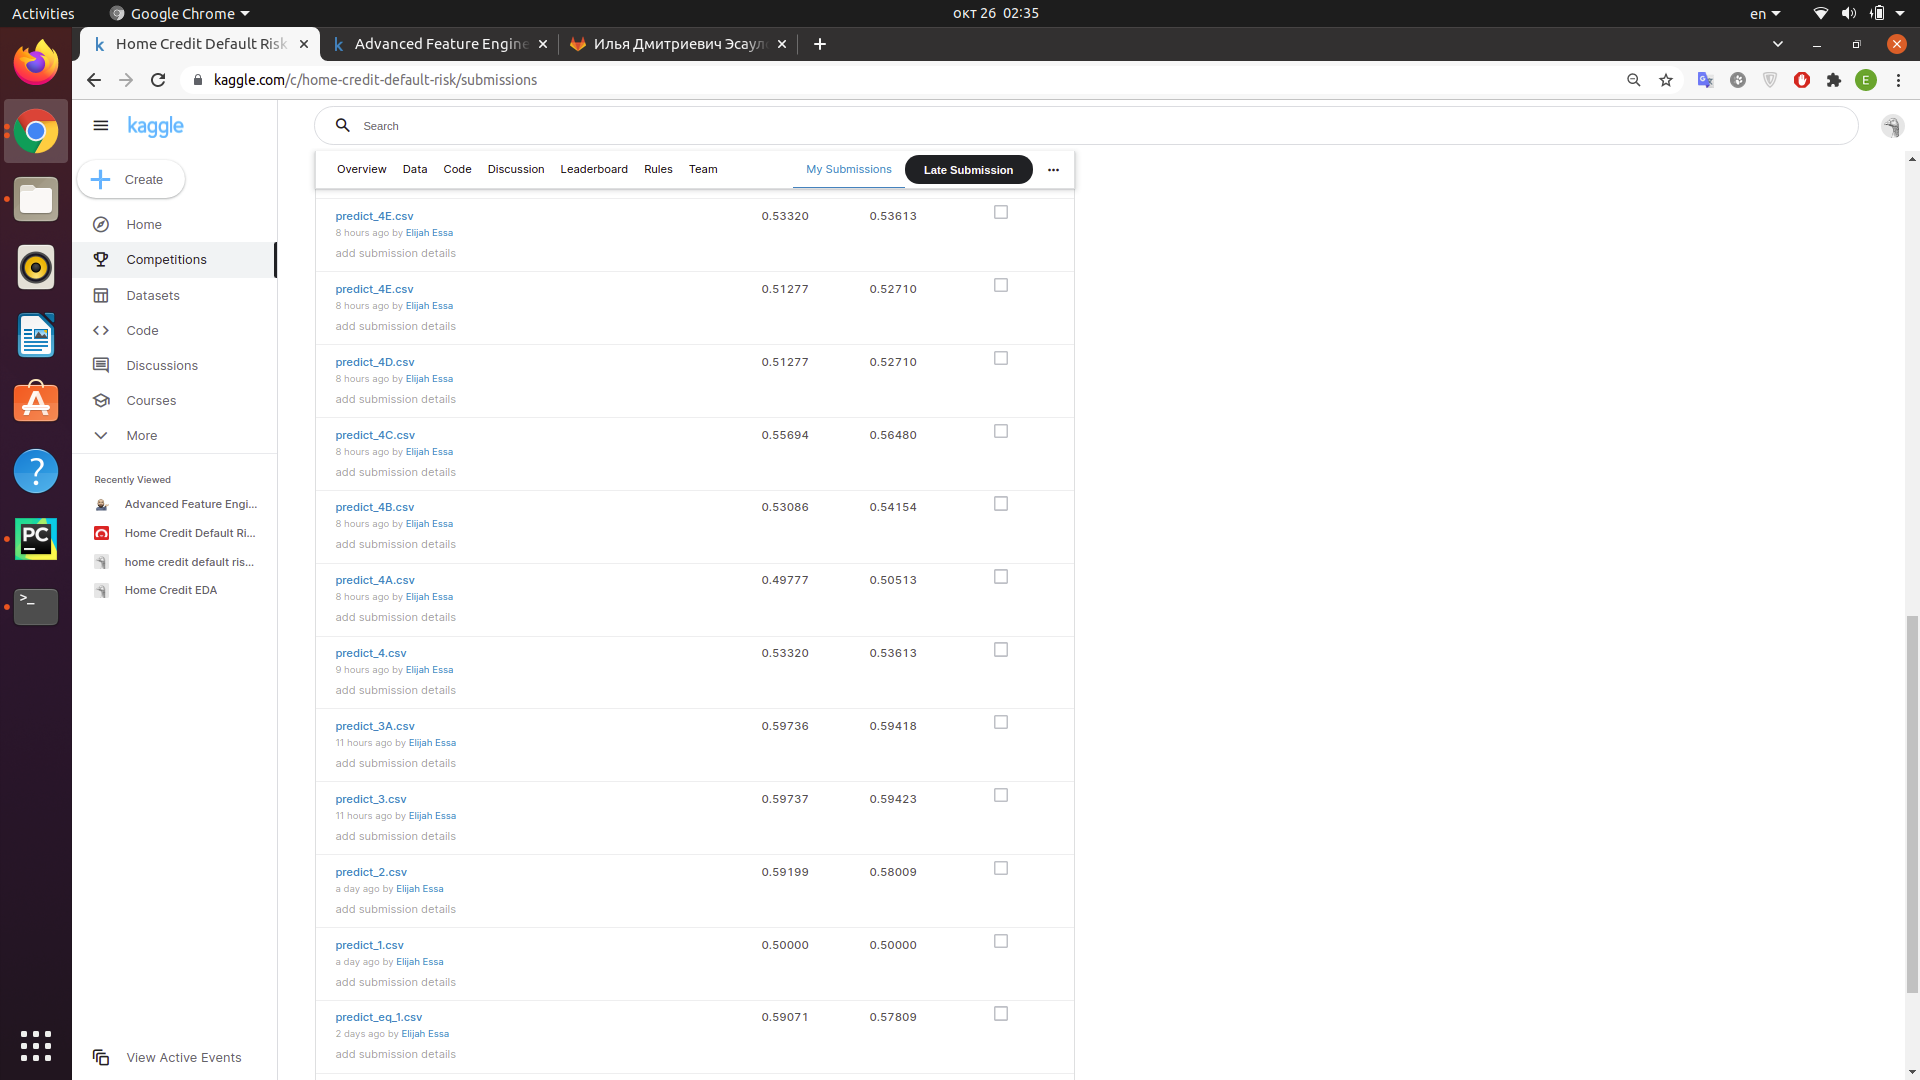

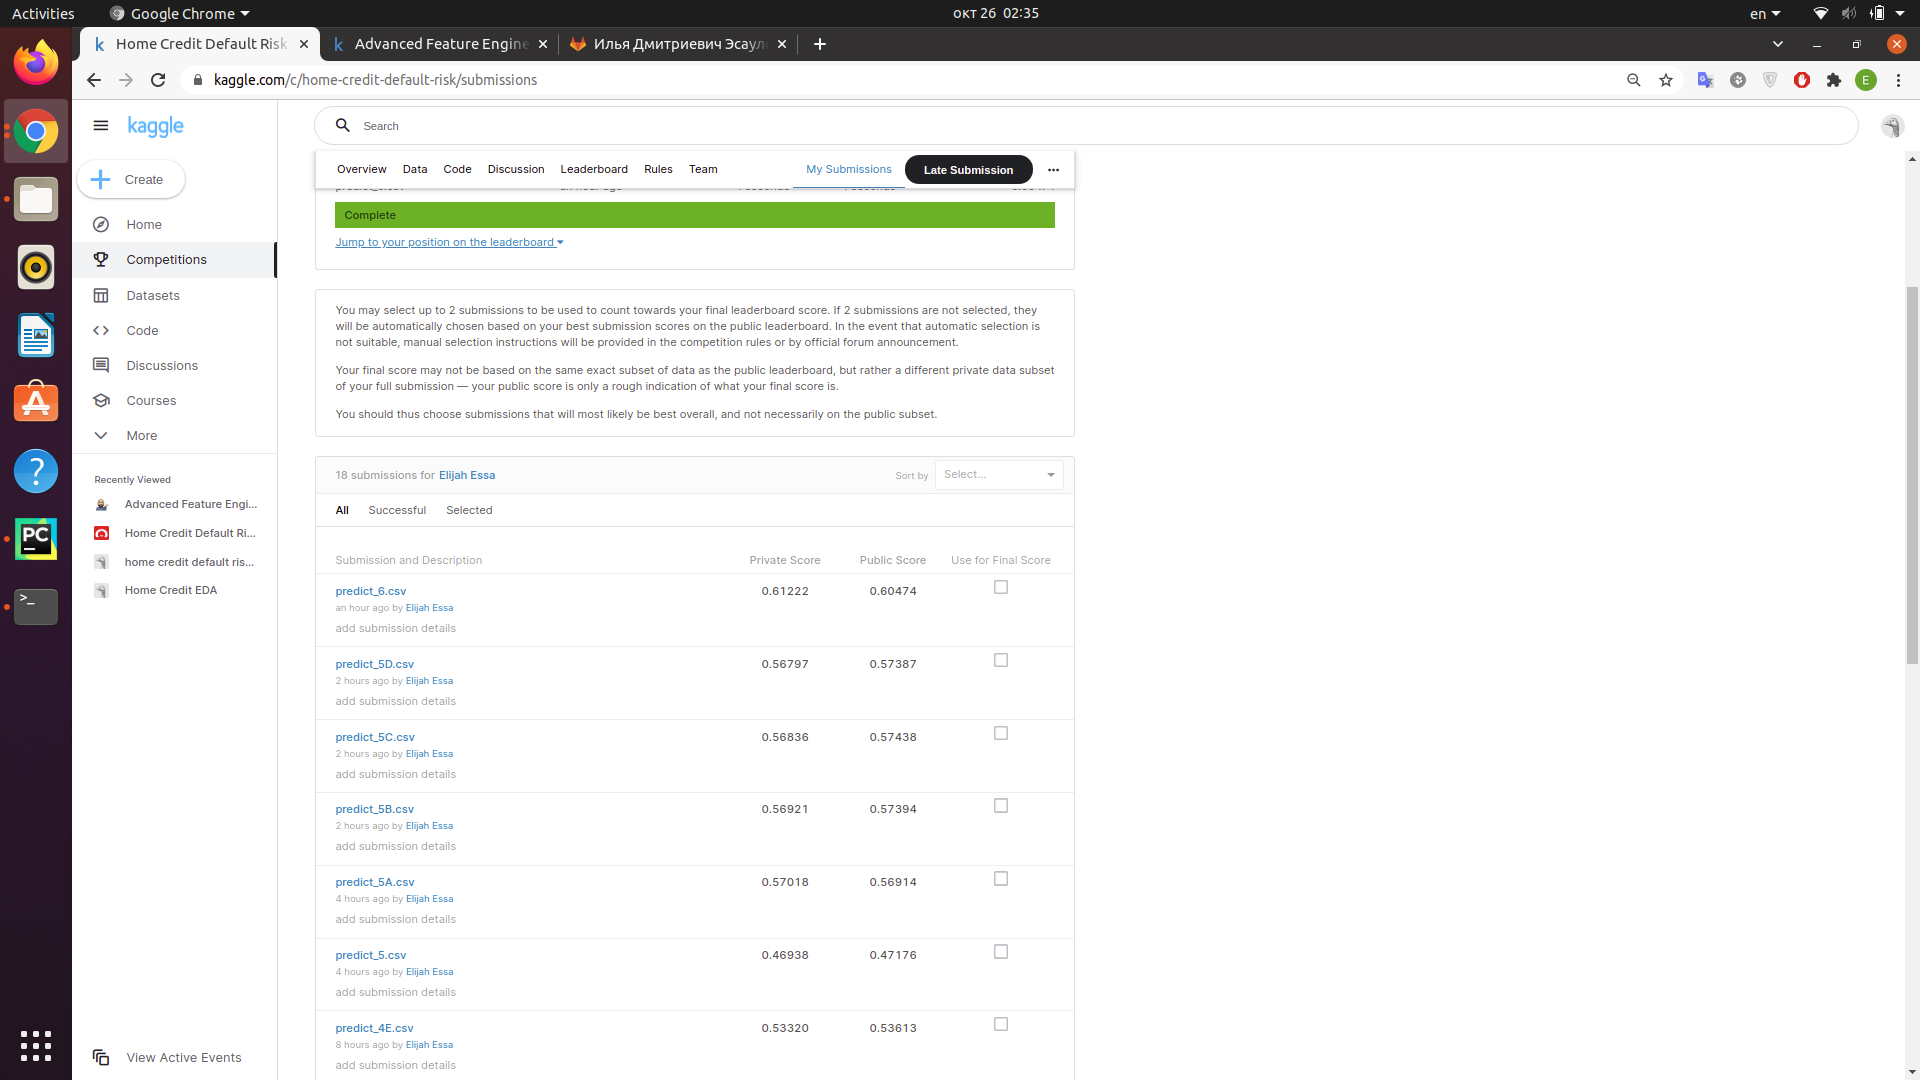

Отобрал признаки, которые кажутся многообещающими.

In [ ]:
# CODE_GENDER - Gender of the client
# FLAG_OWN_CAR - Flag if the client owns a car
# FLAG_OWN_REALTY	Flag if client owns a house or flat
# CNT_CHILDREN - Number of children the client has
# AMT_INCOME_TOTAL - Income of the client
# AMT_CREDIT - Credit amount of the loan
# NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan
# NAME_INCOME_TYPE - Clients income type (businessman, working, maternity leave...)
# NAME_EDUCATION_TYPE - Level of highest education the client achieved
# NAME_FAMILY_STATUS - Family status of the client
# NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)
# REGION_POPULATION_RELATIVE - Normalized population of region where client lives 
# (higher number means the client lives in more populated region)

DAYS_BIRTH - Clients age in days at the time of application
DAYS_EMPLOYED - How many days before the application the person started current employment
OWN_CAR_AGE - Age of clients car
FLAG_CONT_MOBILE - Was mobile phone reachable (1=YES, 0=NO)
What kind of occupation does the client have
REGION_RATING_CLIENT - Our rating of the region where client lives (1,2,3)
# Перевести через ONE HOT ENCODE
HOUR_APPR_PROCESS_START - Approximately at what hour did the client apply for the loan
REG_REGION_NOT_LIVE_REGION - Flag if client's permanent address does not match contact address 
(1=different, 0=same, at region level)
ORGANIZATION_TYPE - Type of organization where client works
LANDAREA_AVG
FONDKAPREMONT_MODE
HOUSETYPE_MODE
TOTALAREA_MODE
DAYS_LAST_PHONE_CHANGE How many days before application did client change phone
AMT_REQ_CREDIT_BUREAU_MON Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
CREDIT_DAY_OVERDUE Number of days past due on CB credit at the time of application for related loan in our sample
DAYS_ENDDATE_FACT Days since CB credit ended at the time of application in Home Credit (only for closed credit)
AMT_CREDIT_SUM Current credit amount for the Credit Bureau credit
AMT_DRAWINGS_ATM_CURRENT Amount drawing at ATM during the month of the previous credit
AMT_DRAWINGS_POS_CURRENT Amount drawing or buying goods during the month of the previous credit 
AMT_INST_MIN_REGULARITY	Minimal installment for this month of the previous credit
CNT_CREDIT_PROLONG How many times was the Credit Bureau credit prolonged
NAME_CONTRACT_STATUS Contract status (approved, cancelled, ...) of previous application
CODE_REJECT_REASON Why was the previous application rejected
NAME_TYPE_SUITE Who accompanied client when applying for the previous application
NAME_CLIENT_TYPE Was the client old or new client when applying for the previous application
NAME_PORTFOLIO Was the previous application for CASH, POS, CAR,
CHANNEL_TYPE Through which channel we acquired the client on the previous application
NFLAG_INSURED_ON_APPROVAL Did the client requested insurance during the previous application

DAYS_REGISTRATION How many days before the application did client change his registration
DAYS_ID_PUBLISH How many days before the application did client change the identity document with which he applied for the loan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
train = pd.read_csv('../data/raw/application_train.csv')
test = pd.read_csv('../data/raw/application_test.csv')
# ************************************************************************

Собираю main матрицу признаков train / test

Выбираю фичи, с которыми буду работать

Сохраняю только полезные для меня колонки

# Изучаю данные
Выбрал 1е несколько признаков

In [4]:
main_train = train.copy()
main_test = test.copy()
features_1_set = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE','TARGET']
features_1_set_not_tar = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE']
features_1_set_str = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
features_1_set_float = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','REGION_POPULATION_RELATIVE']
target = 'TARGET'

main_train = main_train[features_1_set]
main_test = main_test[features_1_set_not_tar]

Смотрю NaN

NAME_TYPE_SUITE

In [5]:
main_train.info() # main_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CODE_GENDER                 307511 non-null  object 
 1   FLAG_OWN_CAR                307511 non-null  object 
 2   FLAG_OWN_REALTY             307511 non-null  object 
 3   CNT_CHILDREN                307511 non-null  int64  
 4   AMT_INCOME_TOTAL            307511 non-null  float64
 5   AMT_CREDIT                  307511 non-null  float64
 6   NAME_TYPE_SUITE             306219 non-null  object 
 7   NAME_INCOME_TYPE            307511 non-null  object 
 8   NAME_EDUCATION_TYPE         307511 non-null  object 
 9   NAME_FAMILY_STATUS          307511 non-null  object 
 10  NAME_HOUSING_TYPE           307511 non-null  object 
 11  REGION_POPULATION_RELATIVE  307511 non-null  float64
 12  TARGET                      307511 non-null  int64  
dtypes: float64(3),

Смотрю выбросы

'CNT_CHILDREN', 'AMT_INCOME_TOTAL'

In [6]:
main_train.describe() # main_test.describe() 

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,TARGET
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,0.020868,0.080729
std,0.722121,2.371231e+05,4.024908e+05,0.013831,0.272419
min,0.000000,2.565000e+04,4.500000e+04,0.000290,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,0.010006,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,0.018850,0.000000
75%,1.000000,2.025000e+05,8.086500e+05,0.028663,0.000000
max,19.000000,1.170000e+08,4.050000e+06,0.072508,1.000000


Смотрю категориальные признаки

In [7]:
main_train.describe() # main_test.describe() 

matrix = main_test

for col in matrix[features_1_set_str].columns:
    print(matrix[col].value_counts())
    print()


F    32678
M    16066
Name: CODE_GENDER, dtype: int64

N    32311
Y    16433
Name: FLAG_OWN_CAR, dtype: int64

Y    33658
N    15086
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      39727
Family              5881
Spouse, partner     1448
Children             408
Other_B              211
Other_A              109
Group of people       49
Name: NAME_TYPE_SUITE, dtype: int64

Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Businessman                 1
Unemployed                  1
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    33988
Higher education                 12516
Incomplete higher                 1724
Lower secondary                    475
Academic degree                     41
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 32283
Single / not married     7036
Civil marriage           4261
Separated                2955
Widow         

Выводы по категориальным признакам.

Бинарные:

'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'

С выбросами:

'CODE_GENDER' - заменить XNA на F

'NAME_INCOME_TYPE' - Сделать бинарным классом. Working & Commercial associate = 1 (т.к. у них выборка делится соотношением 1 к 10), остальные = 0

'NAME_FAMILY_STATUS' - Сделать бинарным классом. Single / not married & Civil marriage = 1 (почти одинаковое соотношение 1 к 9), остальные = 0 

'NAME_EDUCATION_TYPE' - Сделать бинарным классом. Lower secondary & Incomplete higher & Secondary / secondary special = 1, остальное = 0 

(Lower secondary 3.4 \ 0.4, 
Incomplete higher 9.4 \ 0.9, 
Secondary / secondary special 200 \ 20)

'NAME_HOUSING_TYPE' - Соотношение таргета у людей, снимающих жилье: (Rented apartment): 4.3 / 0.6 = 0.14.
Выделю для него отдельный бинарный столбик.

'NAME_TYPE_SUITE' - Сделать бинарным классом. Unaccompanied , Other_B , Other_A , Group of people = 1. Остальные 0


Проверяю содержание таргета = 1 в группах (NAME_TYPE_SUITE) у конкретных категорий (Group of people)

In [8]:
k = main_train[main_train['NAME_TYPE_SUITE'] == 'Group of people']

# sum([1 for tar in k['TARGET'] if tar == 1])
k[['NAME_INCOME_TYPE','TARGET']].head(100)
print(sum(k['TARGET'] == 1) / sum(k['TARGET'] == 0))


0.09274193548387097


# 1 МОДЕЛЬ
Обрабатываю данные (заменяю NaN's на Медианные значения, нормализую выбросы, делаю бинарные классы, сокращаю количество категорий в категориальных признаках).

Оставляю данные с оригинальным соотношением объектов с ответами 1 и 0.

Убираю NaN's

In [9]:
outl_col = 'NAME_TYPE_SUITE'

main_train[outl_col].fillna('Unaccompanied', inplace = True)
main_test[outl_col].fillna('Unaccompanied', inplace = True)

Нормализую выбросы

In [10]:
INCOME_upper = main_train['AMT_INCOME_TOTAL'].quantile(0.75) * 1.4
CHILDREN_upper = 4

main_train['AMT_INCOME_TOTAL'].clip(upper = INCOME_upper, inplace = True)
main_train['CNT_CHILDREN'].clip(upper = CHILDREN_upper, inplace = True)

main_test['AMT_INCOME_TOTAL'].clip(upper = INCOME_upper, inplace = True)
main_test['CNT_CHILDREN'].clip(upper = CHILDREN_upper, inplace = True)

Делаю бинарные классы

'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'

In [11]:
main_train['CODE_GENDER'] = np.where(main_train['CODE_GENDER'] == 'F', 1, 0)
main_test['CODE_GENDER'] = np.where(main_test['CODE_GENDER'] == 'F', 1, 0)

main_train['FLAG_OWN_CAR'] = np.where(main_train['FLAG_OWN_CAR'] == 'Y', 1, 0)
main_test['FLAG_OWN_CAR'] = np.where(main_test['FLAG_OWN_CAR'] == 'Y', 1, 0)

main_train['FLAG_OWN_REALTY'] = np.where(main_train['FLAG_OWN_REALTY'] == 'Y', 1, 0)
main_test['FLAG_OWN_REALTY'] = np.where(main_test['FLAG_OWN_REALTY'] == 'Y', 1, 0)

Обрабатываю категориальные признаки. Уменьшаю количество категорий (Civil marriage) в группах (NAME_FAMILY_STATUS) путем объединения признаков, дающих похожее соотношение по ответам с 1.

In [12]:
def Handling_cat_features(train, test, col, vals_list):
    train[col].replace(to_replace = vals_list, value = 1, inplace = True)
    test[col].replace(to_replace = vals_list, value = 1, inplace = True)
    train[col] = np.where(train[col] == 1, 1, 0)
    test[col] = np.where(test[col] == 1, 1, 0)
    return train[col], test[col]

In [13]:
# 'NAME_FAMILY_STATUS'
main_train['NAME_FAMILY_STATUS'], main_test['NAME_FAMILY_STATUS'] = Handling_cat_features(main_train, 
                                                                                          main_test, 
                                                                                          'NAME_FAMILY_STATUS', 
                                                                                          ['Single / not married','Civil marriage'])
# 'NAME_INCOME_TYPE'
main_train['NAME_INCOME_TYPE'], main_test['NAME_INCOME_TYPE'] = Handling_cat_features(main_train, 
                                                                                          main_test, 
                                                                                          'NAME_INCOME_TYPE', 
                                                                                          ['Working','Commercial associate'])
# 'NAME_EDUCATION_TYPE'
main_train['NAME_EDUCATION_TYPE'], main_test['NAME_EDUCATION_TYPE'] = Handling_cat_features(main_train, 
                                                                                          main_test, 
                                                                                          'NAME_EDUCATION_TYPE', 
                                                                                          ['Lower secondary', 'Incomplete higher', 'Secondary / secondary special'])
# 'NAME_TYPE_SUITE'
main_train['NAME_TYPE_SUITE'], main_test['NAME_TYPE_SUITE'] = Handling_cat_features(main_train, 
                                                                                          main_test, 
                                                                                          'NAME_TYPE_SUITE', 
                                                                                          ['Unaccompanied', 'Other_B', 'Other_A', 'Group of people'])

Создаю новый признак NAME_HOUSING_TYPE_rented на основе старого. Новый признак коррелирует с таргетом больше, чем альтернативные признаки. 

In [14]:
# 'NAME_HOUSING_TYPE_rented'
main_train['NAME_HOUSING_TYPE_rented'] = main_train['NAME_HOUSING_TYPE']
main_test['NAME_HOUSING_TYPE_rented'] = main_test['NAME_HOUSING_TYPE']
main_train['NAME_HOUSING_TYPE_rented'] = np.where(main_train['NAME_HOUSING_TYPE_rented'] == 'Rented apartment', 1, 0)
main_test['NAME_HOUSING_TYPE_rented'] = np.where(main_test['NAME_HOUSING_TYPE_rented'] == 'Rented apartment', 1, 0)

Обработанные колонки:

In [15]:
cnt_cols = ['AMT_INCOME_TOTAL','CNT_CHILDREN','AMT_CREDIT','REGION_POPULATION_RELATIVE']

bin_cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE_rented']

target = 'TARGET'

Нормализую числовые признаки

In [16]:
main_train[cnt_cols + bin_cols + [target]].head()

,AMT_INCOME_TOTAL,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE_rented,TARGET
0,202500.0,0,406597.5,0.018801,0,0,1,1,1,1,1,0,1
1,270000.0,0,1293502.5,0.003541,1,0,0,0,0,0,0,0,0
2,67500.0,0,135000.0,0.010032,0,1,1,1,1,1,1,0,0
3,135000.0,0,312682.5,0.008019,1,0,1,1,1,1,1,0,0
4,121500.0,0,513000.0,0.028663,0,0,1,1,1,1,1,0,0


In [17]:
from sklearn.preprocessing import MinMaxScaler

minmax_model = MinMaxScaler()
feat = ['AMT_INCOME_TOTAL','CNT_CHILDREN','AMT_CREDIT']
minmax_model.fit(main_train[feat])
main_train[feat] = minmax_model.transform(main_train[feat])
main_test[feat] = minmax_model.transform(main_test[feat])

train_1 = main_train.copy()
test_1 = main_test.copy()

In [18]:
from sklearn.linear_model import LogisticRegression

LR_model_1 = LogisticRegression()

LR_model_1.fit(train_1[cnt_cols + bin_cols], train_1[target])
predict_1 = LR_model_1.predict(test_1[cnt_cols + bin_cols])

write_submission_1 = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_1[target] = predict_1
write_submission_1.to_csv('predict_1.csv', index= False)

Результат на Kaggle:

PRIV - 0.50000 , PUBL - 0.50000

Количество 0 в результирующем Series с предсказаниями:

In [19]:
write_submission_1[target].value_counts()

0    48744
Name: TARGET, dtype: int64

# 2 МОДЕЛЬ

Убираю большую часть объектов из датасета с ответом = 0, чтобы достичь соотношения объектов (с ответами 1 и 0) 1 к 1. 

In [20]:
main_train_1 = main_train[main_train['TARGET'] == 1].copy()
main_train_0 = main_train[main_train['TARGET'] == 0].copy()
train_2 = main_train_1.append(main_train_0.sample(26000))
test_2 = main_test.copy()

In [21]:
from sklearn.linear_model import LogisticRegression

LR_model_2 = LogisticRegression()

LR_model_2.fit(train_2[cnt_cols + bin_cols], train_2[target])
predict_2 = LR_model_2.predict(test_2[cnt_cols + bin_cols])

write_submission_2 = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_2[target] = predict_2
write_submission_2.to_csv('predict_2.csv', index= False)

Результат на Kaggle:

PRIV - 0.59199 , PUBL - 0.58009

# Подготовка новых фичей

Использую новый набор признаков. В этот раз подхожу к набору фичей более осмысленно.

In [22]:
cols_for_3_model = ['CODE_GENDER',
'FLAG_OWN_CAR',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'REGION_RATING_CLIENT',
'REG_REGION_NOT_LIVE_REGION',
'ORGANIZATION_TYPE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

In [23]:
train_3 = train.copy()
test_3 = test.copy()

In [24]:
# Выборка с равными по количеству ответами 1 и 0
train_3_1 = train[train['TARGET'] == 1]
train_3_0 = train[train['TARGET'] == 0].copy()
train_3 = train_3_1.copy() # .append(train_3_0.sample(26000))

train_3_01 = train_3.append(train_3_0.sample(26000))

In [25]:
# Бинарные
bin_cols_3 = ['CODE_GENDER',
'FLAG_OWN_CAR']

# Категориальные
cat_cols_3 = ['NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'REGION_RATING_CLIENT',
'REG_REGION_NOT_LIVE_REGION',
'ORGANIZATION_TYPE']

# Числовые
cnt_cols_3 = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

Проверяю выбросы в бинарных колонках

In [26]:
for col in bin_cols_3:
    print(train_3[col].value_counts())
    print()

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64



Проверяю зависимости между объектами с ответами 1 и (0 & 1)

In [27]:
for col in cat_cols_3:
    print(train_3[col].value_counts())
    print()
    print(train_3_01[col].value_counts())
    print('*' * 100)

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

Working                 28448
Commercial associate    11419
Pensioner                7770
State servant            3175
Unemployed                  9
Maternity leave             3
Businessman                 1
Name: NAME_INCOME_TYPE, dtype: int64
****************************************************************************************************
Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

Secondary / secondary special    37892
Higher education                 10412
Incomplete higher                 1781
Lower secondary                    722
Academic degree                     18
Nam

Список зависимостей. 

Если в 1 категории явный перевес 0 или 1, значит ее нужно выделить в отдельную фичу.
Остальное можно занулять.

'NAME_INCOME_TYPE'
Working
Commercial associate
Pensioner
State servant
Unemployed

'NAME_EDUCATION_TYPE'
Secondary / secondary special
Higher education
Lower secondary

'NAME_FAMILY_STATUS'
Single / not married
Civil marriage
Widow

'NAME_HOUSING_TYPE'
With parents
Rented apartment

'REGION_RATING_CLIENT'
2
3
1

'ORGANIZATION_TYPE'
Self-employed
Medicine
Construction
Government
School
Industry: type 9
Transport: type 3
Military
Bank
Police


'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE'

Функция для применения One Hot Encode к группе по отдельным категориям

In [28]:
# 1) Принимает на вход название ГРУППЫ, КАТЕГОРИИ, матрицу
def cat_handling_3(group, cats, matrix):
# 2) Зануляет по столбцу те строки, которых нет в списке КАТЕГОРИЙ
    matrix[group] = matrix[group].apply(lambda x: 0 if x not in cats else x)
# 3) Создает матрицу с колонками по категориям
    temp_matrix = matrix[[group]]
    temp_matrix = pd.get_dummies(temp_matrix)
# 4) Удаляет категорию с 0 в колонках
    for col in temp_matrix.columns:
        if '_0' in col:
            temp_matrix = temp_matrix.drop(col, axis = 1)
            break
# 5) Удаляет группу в оригинальной матрице и склеивает старую матрицу с One Hot Encode матрицей
    matrix = matrix.drop(group, axis = 1)
    matrix = pd.concat([matrix, temp_matrix], axis = 1)
    return matrix    

Пример работы функции cat_handling_3:

In [29]:
a = ['g', 'h', 'l']
e = {'fed': ['g','h','i'], 'jen': ['k','l','m']}
e = pd.DataFrame(e)
e.head()

,fed,jen
0,g,k
1,h,l
2,i,m


In [30]:
e = cat_handling_3('fed', a, e)
e.head()

,jen,fed_g,fed_h
0,k,1,0
1,l,0,1
2,m,0,0


In [32]:
# Группы, к которым применяется One Hot Encode
cat_cols_3_one_hot = ['NAME_INCOME_TYPE', 
                      'NAME_EDUCATION_TYPE', 
                      'NAME_FAMILY_STATUS', 
                      'NAME_HOUSING_TYPE', 
                      'REGION_RATING_CLIENT', 
                      'ORGANIZATION_TYPE']

# Словарь Группа : список Категорий, по которым нужно сделать One Hot Encode
dict_of_cats_3 = {
    'NAME_INCOME_TYPE':
    ['Working',
    'Commercial associate',
    'Pensioner',
    'State servant',
    'Unemployed'],

    'NAME_EDUCATION_TYPE':
    ['Secondary / secondary special',
    'Higher education',
    'Lower secondary'],

    'NAME_FAMILY_STATUS':
    ['Single / not married',
    'Civil marriage',
    'Widow'],

    'NAME_HOUSING_TYPE':
    ['With parents',
    'Rented apartment'],

    'REGION_RATING_CLIENT':
    [2, 3, 1],

    'ORGANIZATION_TYPE':
    ['Self-employed',
    'Medicine',
    'Construction',
    'Government',
    'School',
    'Industry: type 9',
    'Transport: type 3',
    'Military',
    'Bank',
    'Police']
}

# Бинарные
bin_cols_3 = ['CODE_GENDER',
'FLAG_OWN_CAR']

# Числовые
cnt_cols_3 = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

In [33]:
train_3_try = train_3_01[cat_cols_3_one_hot + [target] + bin_cols_3].copy() # Без cnt_cols_3
test_3_try = test_3[cat_cols_3_one_hot + bin_cols_3].copy() # Без cnt_cols_3

for col in cat_cols_3_one_hot:
    train_3_try = cat_handling_3(col, dict_of_cats_3[col], train_3_try)

for col in cat_cols_3_one_hot:
    test_3_try = cat_handling_3(col, dict_of_cats_3[col], test_3_try)

(50825, 9)
(50825, 27)


In [34]:
train_3_try['CODE_GENDER'] = np.where(train_3_try['CODE_GENDER'] == 'F', 1, 0)
train_3_try['FLAG_OWN_CAR'] = np.where(train_3_try['FLAG_OWN_CAR'] == 'Y', 1, 0)

In [35]:
test_3_try['CODE_GENDER'] = np.where(test_3_try['CODE_GENDER'] == 'F', 1, 0)
test_3_try['FLAG_OWN_CAR'] = np.where(test_3_try['FLAG_OWN_CAR'] == 'Y', 1, 0)

In [36]:
test_3_try.head()

,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,REGION_RATING_CLIENT,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Transport: type 3
0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0


In [37]:
all_cols_3_no_tar = [i for i in test_3_try.columns]

# 3 МОДЕЛЬ

Использую только категориальные признаки

In [38]:
from sklearn.linear_model import LogisticRegression

LR_model_3 = LogisticRegression()

LR_model_3.fit(train_3_try[all_cols_3_no_tar], train_3_try[target])
predict_3 = LR_model_3.predict(test_3_try[all_cols_3_no_tar])

write_submission_3 = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_3[target] = predict_3
write_submission_3.to_csv('predict_3.csv', index= False)

Соотношение предсказанных 1 к 0

In [249]:
sum([1 for i in write_submission_3[target] if i == 1]) / sum([1 for i in write_submission_3[target]])

0.40288035450516985

Результат на Kaggle: 

PRIV - 0.59737  ,  PUBL - 0.59423

# 3A МОДЕЛЬ (MinMax)

In [39]:
from sklearn.preprocessing import MinMaxScaler

minmax_model_3A = MinMaxScaler()
train_3A_try = train_3_try.copy()
test_3A_try = test_3_try.copy()
feat = ['REGION_RATING_CLIENT']

minmax_model_3A.fit(train_3A_try[feat])
train_3A_try[feat] = minmax_model_3A.transform(train_3A_try[feat])
test_3A_try[feat] = minmax_model_3A.transform(test_3A_try[feat])

In [40]:
train_3A_try.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,REGION_RATING_CLIENT,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Transport: type 3
0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0
26,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1.0,0,0,0,0,0,0,0,0,0,0
40,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0
42,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1.0,0,0,0,0,0,0,0,0,1,0
81,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.linear_model import LogisticRegression

LR_model_3A = LogisticRegression()

LR_model_3A.fit(train_3A_try[all_cols_3_no_tar], train_3A_try[target])
predict_3A = LR_model_3A.predict(test_3A_try[all_cols_3_no_tar])

write_submission_3A = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_3A[target] = predict_3A
write_submission_3A.to_csv('predict_3A.csv', index= False)

Результат на Kaggle: 

PRIV - 0.59736  ,  PUBL - 0.59418

# 4 МОДЕЛЬ

Обучаю модель на числовых признаках

In [42]:
train_4 = train_3_01.copy()
test_4 = test_3.copy()

cnt_cols_4 = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

In [43]:
train_4[cnt_cols_4 + [target]].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,OWN_CAR_AGE,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,TARGET
0,0,202500.0,-637,NaN,0.0149,-1134.0,1
26,0,112500.0,-2628,NaN,0.0085,-161.0,1
40,0,202500.0,-1262,NaN,0.1463,-1075.0,1
42,0,135000.0,-3597,NaN,NaN,-1480.0,1
81,0,81000.0,365243,NaN,NaN,0.0,1


In [44]:
np.shape(train_4[cnt_cols_4])

(50825, 6)

In [45]:
train_4[cnt_cols_4].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,OWN_CAR_AGE,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
count,50825.000000,5.082500e+04,50825.000000,16489.000000,24598.000000,50825.000000
mean,0.435947,1.673721e+05,54090.177177,12.759597,0.096578,-891.947290
std,0.740512,5.267029e+05,132268.543638,12.278536,0.102975,797.651313
min,0.000000,2.565000e+04,-17531.000000,0.000000,0.000000,-4131.000000
25%,0.000000,1.125000e+05,-2483.000000,5.000000,0.038400,-1479.000000
50%,0.000000,1.440000e+05,-1112.000000,10.000000,0.066100,-677.000000
75%,1.000000,2.025000e+05,-335.000000,16.000000,0.117700,-240.000000
max,19.000000,1.170000e+08,365243.000000,91.000000,1.000000,0.000000


In [46]:
train_4[cnt_cols_4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50825 entries, 0 to 168597
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CNT_CHILDREN            50825 non-null  int64  
 1   AMT_INCOME_TOTAL        50825 non-null  float64
 2   DAYS_EMPLOYED           50825 non-null  int64  
 3   OWN_CAR_AGE             16489 non-null  float64
 4   TOTALAREA_MODE          24598 non-null  float64
 5   DAYS_LAST_PHONE_CHANGE  50825 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.7 MB


NaN's в следующих признаках:

OWN_CAR_AGE  ,  TOTALAREA_MODE

С выбросами:

CNT_CHILDREN  ,  AMT_INCOME_TOTAL  ,  DAYS_EMPLOYED  ,  DAYS_LAST_PHONE_CHANGE

Что собираюсь делать с колонками? 

OWN_CAR_AGE  -  оставлю as is 

TOTALAREA_MODE  -  оставлю as is 

CNT_CHILDREN  -  Ограничу макс количество детей до 5

AMT_INCOME_TOTAL  -  Ограничу макс доход до 0.75 квантиля, домноженного на 1.3

DAYS_EMPLOYED  -  Установлю минимум и максимум у колонки.

DAYS_LAST_PHONE_CHANGE  -  оставлю as is 

DAYS_EMPLOYED

Чищу выбросы по колонке Трудоустройства. Если человек работает достаточно долго (от 1 года), он вероятнеее отдаст кредит вовремя, так как знает свои возможности. Безработные получают перевес в 1000. NaN's заполняются Медианными значениями.

In [47]:
col_days_min = round(train_4['DAYS_EMPLOYED'].quantile(0.2) * 1.3)
train_4['DAYS_EMPLOYED'].clip(lower = col_days_min, upper = 1000, inplace = True)

OWN_CAR_AGE

Проверяю фичу Возраст машины. Чем больше лет машине (допускаю, что среди них нет раритетных авто), тем выше вероятность того, что у человека хороший доход, что может отражать его высокую платежеспособность. Если у человека нет машины, его статус приравнивается к владению авто, возраст которой сильно выше чем у людей, у которых машина есть.

Признак не редактирую

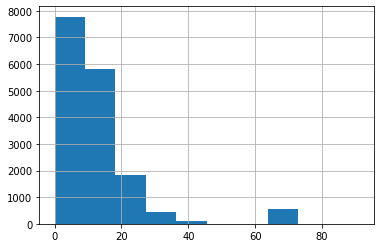

In [48]:
train_4['OWN_CAR_AGE'].hist()
None

In [49]:
# TRAIN
# CNT_CHILDREN
train_4['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
max_income = round(train_4['AMT_INCOME_TOTAL'].quantile(0.75) * 1.5)
train_4['AMT_INCOME_TOTAL'].clip(upper = max_income, inplace = True)
# DAYS_EMPLOYED
col_days_min = round(train_4['DAYS_EMPLOYED'].quantile(0.2) * 1.3)
train_4['DAYS_EMPLOYED'].clip(lower = col_days_min, upper = 1000, inplace = True)

In [50]:
# TEST 
# CNT_CHILDREN
test_4['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
test_4['AMT_INCOME_TOTAL'].clip(upper = max_income, inplace = True)
# DAYS_EMPLOYED
test_4['DAYS_EMPLOYED'].clip(lower = col_days_min, upper = 1000, inplace = True)

Заменяю NaN's на медианы

In [51]:
# TRAIN
med_car = train_4['OWN_CAR_AGE'].median()
train_4['OWN_CAR_AGE'] = train_4['OWN_CAR_AGE'].fillna(med_car)
med_area = train_4['TOTALAREA_MODE'].median()
train_4['TOTALAREA_MODE'] = train_4['TOTALAREA_MODE'].fillna(med_area)

In [52]:
# TEST
test_4['OWN_CAR_AGE'] = test_4['OWN_CAR_AGE'].fillna(med_car)
test_4['TOTALAREA_MODE'] = test_4['TOTALAREA_MODE'].fillna(med_area)

In [53]:
from sklearn.linear_model import LogisticRegression

LR_model_4 = LogisticRegression()

LR_model_4.fit(train_4[cnt_cols_4], train_4[target])
predict_4 = LR_model_4.predict(test_4[cnt_cols_4])

write_submission_4 = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_4[target] = predict_4
write_submission_4.to_csv('predict_4.csv', index= False)

Результат на Kaggle:

PRIV - 0.53320 , PUBL - 0.53613

# 4A МОДЕЛЬ

Обрежу NAN's данные

In [54]:
train_4A = train_3_01.copy()
test_4A = test_3.copy()

cnt_cols_4 = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

In [55]:
train_4A[cnt_cols_4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50825 entries, 0 to 168597
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CNT_CHILDREN            50825 non-null  int64  
 1   AMT_INCOME_TOTAL        50825 non-null  float64
 2   DAYS_EMPLOYED           50825 non-null  int64  
 3   OWN_CAR_AGE             16489 non-null  float64
 4   TOTALAREA_MODE          24598 non-null  float64
 5   DAYS_LAST_PHONE_CHANGE  50825 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.7 MB


In [56]:
# Дропаем строки с NAN's по TOTALAREA_MODE
train_4A.dropna(subset=['TOTALAREA_MODE'], inplace=True)

In [57]:
# Записываем медианы для test выборки и заполняем NaN's медианными значениями
# TRAIN
med_car_4A = train_4A['OWN_CAR_AGE'].median()
med_area_4A = train_4A['TOTALAREA_MODE'].median()
train_4A['OWN_CAR_AGE'].fillna(med_car_4A, inplace = True)

In [58]:
# TEST
test_4A['OWN_CAR_AGE'].fillna(med_car_4A, inplace = True)
test_4A['TOTALAREA_MODE'].fillna(med_area_4A, inplace = True)

In [59]:
# TRAIN
# CNT_CHILDREN
train_4A['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
max_income_4A = round(train_4A['AMT_INCOME_TOTAL'].quantile(0.75) * 1.5)
train_4A['AMT_INCOME_TOTAL'].clip(upper = max_income_4A, inplace = True)
# DAYS_EMPLOYED
col_days_min_4A = round(train_4A['DAYS_EMPLOYED'].quantile(0.2) * 1.3)
train_4A['DAYS_EMPLOYED'].clip(lower = col_days_min_4A, upper = 1000, inplace = True)

In [60]:
# TEST
# CNT_CHILDREN
test_4A['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
test_4A['AMT_INCOME_TOTAL'].clip(upper = max_income_4A, inplace = True)
# DAYS_EMPLOYED
test_4A['DAYS_EMPLOYED'].clip(lower = col_days_min_4A, upper = 1000, inplace = True)

Ниже описание данных после их обрезки

In [61]:
train_4A[cnt_cols_4].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,OWN_CAR_AGE,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
0,0,202500.0,-637,9.0,0.0149,-1134.0
26,0,112500.0,-2628,9.0,0.0085,-161.0
40,0,202500.0,-1262,9.0,0.1463,-1075.0
110,1,157500.0,-267,9.0,0.1284,-56.0
154,0,157500.0,-4031,9.0,0.0552,-216.0


In [62]:
train_4A[cnt_cols_4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24598 entries, 0 to 141341
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CNT_CHILDREN            24598 non-null  int64  
 1   AMT_INCOME_TOTAL        24598 non-null  float64
 2   DAYS_EMPLOYED           24598 non-null  int64  
 3   OWN_CAR_AGE             24598 non-null  float64
 4   TOTALAREA_MODE          24598 non-null  float64
 5   DAYS_LAST_PHONE_CHANGE  24598 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.3 MB


In [63]:
train_4A[cnt_cols_4].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,OWN_CAR_AGE,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
count,24598.000000,24598.000000,24598.000000,24598.000000,24598.000000,24598.000000
mean,0.400968,168994.200683,-1402.467518,9.940158,0.096578,-938.730100
std,0.686148,71431.129770,1598.488512,7.351423,0.102975,823.473107
min,0.000000,27000.000000,-4031.000000,0.000000,0.000000,-4131.000000
25%,0.000000,112500.000000,-2615.000000,9.000000,0.038400,-1534.000000
50%,0.000000,157500.000000,-1141.000000,9.000000,0.066100,-725.000000
75%,1.000000,216000.000000,-333.000000,9.000000,0.117700,-258.000000
max,5.000000,324000.000000,1000.000000,65.000000,1.000000,0.000000


In [64]:
from sklearn.linear_model import LogisticRegression

LR_model_4A = LogisticRegression()

LR_model_4A.fit(train_4A[cnt_cols_4], train_4A[target])
predict_4A = LR_model_4A.predict(test_4A[cnt_cols_4])

write_submission_4A = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_4A[target] = predict_4A
write_submission_4A.to_csv('predict_4A.csv', index= False)

Результат на Kaggle:

PRIV - 0.49777 , PUBL - 0.50513

# 4B МОДЕЛЬ

Привожу признаки к 1 масштабу

In [66]:
from sklearn.preprocessing import MinMaxScaler

minmax_model_4B = MinMaxScaler()

feat = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

train_4B = train_4A.copy()
test_4B = test_4A.copy()

minmax_model_4B.fit(train_4A[feat])
train_4B[feat] = minmax_model_4B.transform(train_4A[feat])
test_4B[feat] = minmax_model_4B.transform(test_4A[feat])

In [388]:
train_4B[feat].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,OWN_CAR_AGE,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
0,0.0,0.590909,0.668825,0.138462,0.0149,0.726944
26,0.0,0.287879,0.266033,0.138462,0.0085,0.961233
40,0.0,0.590909,0.542383,0.138462,0.1463,0.741151
110,0.2,0.439394,0.743678,0.138462,0.1284,0.986516
154,0.0,0.439394,0.000000,0.138462,0.0552,0.947989


In [67]:
from sklearn.linear_model import LogisticRegression

LR_model_4B = LogisticRegression()

LR_model_4B.fit(train_4B[cnt_cols_4], train_4B[target])
predict_4B = LR_model_4B.predict(test_4B[cnt_cols_4])

write_submission_4B = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_4B[target] = predict_4B
write_submission_4B.to_csv('predict_4B.csv', index= False)

Результат на Kaggle:

PRIV - 0.53086 , PUBL - 0.54154

# 4C МОДЕЛЬ

МинМакс на 4 модели

In [68]:
# Привожу обработанные данные из 4 модели к 1 масштабу

from sklearn.preprocessing import MinMaxScaler

minmax_model_4C = MinMaxScaler()

feat = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

train_4C = train_4.copy()
test_4C = test_4.copy()

minmax_model_4C.fit(train_4C[feat])
train_4C[feat] = minmax_model_4C.transform(train_4C[feat])
test_4C[feat] = minmax_model_4C.transform(test_4C[feat])

In [69]:
from sklearn.linear_model import LogisticRegression

LR_model_4C = LogisticRegression()

LR_model_4C.fit(train_4C[cnt_cols_4], train_4C[target])
predict_4C = LR_model_4C.predict(test_4C[cnt_cols_4])

write_submission_4C = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_4C[target] = predict_4C
write_submission_4C.to_csv('predict_4C.csv', index= False)

Результат на Kaggle:

PRIV - 0.55694 , PUBL - 0.56480

# 4D МОДЕЛЬ

Вместо медиан макс значения в OWN_CAR_AGE

In [70]:
# Привожу обработанные данные из 4 модели к 1 масштабу

feat = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

train_4D = train_4.copy()
test_4D = test_4.copy()

# OWN_CAR_AGE

In [71]:
train_4D['OWN_CAR_AGE'] = train_3_01['OWN_CAR_AGE']

In [72]:
train_4D[feat].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,OWN_CAR_AGE,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
count,50825.000000,50825.000000,50825.000000,16489.000000,50825.000000,50825.000000
mean,0.435042,158516.665953,-1333.869139,12.759597,0.080850,-891.947290
std,0.730130,67306.702789,1524.523425,12.278536,0.073238,797.651313
min,0.000000,25650.000000,-3821.000000,0.000000,0.000000,-4131.000000
25%,0.000000,112500.000000,-2483.000000,5.000000,0.066100,-1479.000000
50%,0.000000,144000.000000,-1112.000000,10.000000,0.066100,-677.000000
75%,1.000000,202500.000000,-335.000000,16.000000,0.066100,-240.000000
max,5.000000,303750.000000,1000.000000,91.000000,1.000000,0.000000


In [73]:
# TRAIN
train_4D['OWN_CAR_AGE'].clip(upper = 64, inplace = True)
train_4D['OWN_CAR_AGE'].fillna(64, inplace = True)

# TEST
test_4D['OWN_CAR_AGE'].clip(upper = 64, inplace = True)
test_4D['OWN_CAR_AGE'].fillna(64, inplace = True)

In [75]:
from sklearn.linear_model import LogisticRegression

LR_model_4D = LogisticRegression()

LR_model_4D.fit(train_4D[cnt_cols_4], train_4D[target])
predict_4D = LR_model_4D.predict(test_4D[cnt_cols_4])

write_submission_4D = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_4D[target] = predict_4D
write_submission_4D.to_csv('predict_4D.csv', index= False)

Результат на Kaggle:

PRIV - 0.51277 , PUBL - 0.52710

# 4E МОДЕЛЬ
Дропаю колонку OWN_CAR_AGE

In [76]:
# Привожу обработанные данные из 4 модели к 1 масштабу

feat = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

train_4E = train_4D.copy()
test_4E = test_4D.copy()

# OWN_CAR_AGE

In [77]:
from sklearn.linear_model import LogisticRegression

LR_model_4E = LogisticRegression()

LR_model_4E.fit(train_4D[feat], train_4D[target])
predict_4E = LR_model_4E.predict(test_4D[feat])

write_submission_4E = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_4E[target] = predict_4E
write_submission_4E.to_csv('predict_4E.csv', index= False)

Результат на Kaggle:

PRIV - 0.53320 , PUBL - 0.53613

# 5 МОДЕЛЬ

Превращаю некоторые числовые признаки в категориальные. Привожу признаки к 1 масштабу.

Что собираюсь делать с колонками?

OWN_CAR_AGE - Поделю на категориальные признаки.

1) Владение машиной с 0 до 5 лет вклюительно = 1 (вы вообще видели цены на новые тачки в 2021??).

2) Остальные владельцы авто в отдельную колонку.

TOTALAREA_MODE - оставлю as is

CNT_CHILDREN - Ограничу макс количество детей до 5

AMT_INCOME_TOTAL - Ограничу макс доход до 0.75 квантиля, домноженного на 1.3

DAYS_EMPLOYED - Установлю минимум и максимум у колонки.

DAYS_LAST_PHONE_CHANGE - Допускаю, что есть 3 категории людей. Делю на 2 категории (2 и 3 номера).

1) Владение телефоном > 7 лет. Телефон людям не интересен. Купили его, чтобы звонить. Отдельная группа, в которой не хочу искать зависимости.

2) Владение телефоном от 3 до 7 лет - не обновляют, потому что есть покупки важнее.

3) Владение телефоном до 3 - следят за новыми моделями, покупают, потому что могут.

In [78]:
cnt_cols_5 = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

train_5 = train_3_01[cnt_cols_5 + [target]].copy()
test_5 = test_3[cnt_cols_5].copy()

In [79]:
# OWN_CAR_AGE разбиваю на 2 колонки новых признаков
# TRAIN
train_5['OWN_CAR_AGE'] = train_5['OWN_CAR_AGE'].fillna(-1)
train_5['OWN_CAR_AGE'] = train_5['OWN_CAR_AGE'].apply(lambda x: '0-5' if (x >= 0 and x <= 5) else '5<' if (x > 5) else 'null')
train_5 = cat_handling_3('OWN_CAR_AGE', ['0-5','5<'], train_5)

# TEST
test_5['OWN_CAR_AGE'] = test_5['OWN_CAR_AGE'].fillna(-1)
test_5['OWN_CAR_AGE'] = test_5['OWN_CAR_AGE'].apply(lambda x: '0-5' if (x >= 0 and x <= 5) else '5<' if (x > 5) else 'null')
test_5 = cat_handling_3('OWN_CAR_AGE', ['0-5','5<'], test_5)
None

In [80]:
# TRAIN
# CNT_CHILDREN
train_5['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
max_income_5 = round(train_5['AMT_INCOME_TOTAL'].quantile(0.75) * 1.5)
train_5['AMT_INCOME_TOTAL'].clip(upper = max_income_5, inplace = True)
# DAYS_EMPLOYED
col_days_min_5 = round(train_5['DAYS_EMPLOYED'].quantile(0.2) * 1.3)
train_5['DAYS_EMPLOYED'].clip(lower = col_days_min_5, upper = 1000, inplace = True)

# TEST
# CNT_CHILDREN
test_5['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
test_5['AMT_INCOME_TOTAL'].clip(upper = max_income_5, inplace = True)
# DAYS_EMPLOYED
test_5['DAYS_EMPLOYED'].clip(lower = col_days_min_5, upper = 1000, inplace = True)

In [81]:
# DAYS_LAST_PHONE_CHANGE разбиваю на 2 колонки новых признаков
# TRAIN
train_5['DAYS_LAST_PHONE_CHANGE'] = train_5['DAYS_LAST_PHONE_CHANGE'].fillna(-1)
train_5['DAYS_LAST_PHONE_CHANGE'] = train_5['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: 'n-3' if (x <= 0 and x >= -3*365) else '6.5<' if (x <= (-6.5*365 - 1)) else 'null')
train_5 = cat_handling_3('DAYS_LAST_PHONE_CHANGE', ['n-3','6.5<'], train_5)

# TEST
test_5['DAYS_LAST_PHONE_CHANGE'] = test_5['DAYS_LAST_PHONE_CHANGE'].fillna(-1)
test_5['DAYS_LAST_PHONE_CHANGE'] = test_5['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: 'n-3' if (x <= 0 and x >= -3*365) else '6.5<' if (x <= (-6.5*365 - 1)) else 'null')
test_5 = cat_handling_3('DAYS_LAST_PHONE_CHANGE', ['n-3','6.5<'], test_5)
None

In [82]:
# Заполняю TOTALAREA_MODE медианными значениями
# TRAIN
med_area_5 = train_5['TOTALAREA_MODE'].median()
train_5['TOTALAREA_MODE'].fillna(med_area_5, inplace = True)
# TEST
test_5['TOTALAREA_MODE'].fillna(med_area_5, inplace = True)

In [83]:
train_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50825 entries, 0 to 168597
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CNT_CHILDREN                 50825 non-null  int64  
 1   AMT_INCOME_TOTAL             50825 non-null  float64
 2   DAYS_EMPLOYED                50825 non-null  int64  
 3   TOTALAREA_MODE               50825 non-null  float64
 4   TARGET                       50825 non-null  int64  
 5   OWN_CAR_AGE_0-5              50825 non-null  uint8  
 6   OWN_CAR_AGE_5<               50825 non-null  uint8  
 7   DAYS_LAST_PHONE_CHANGE_6.5<  50825 non-null  uint8  
 8   DAYS_LAST_PHONE_CHANGE_n-3   50825 non-null  uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 2.5 MB


In [84]:
train_5.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,TOTALAREA_MODE,TARGET,OWN_CAR_AGE_0-5,OWN_CAR_AGE_5<,DAYS_LAST_PHONE_CHANGE_6.5<,DAYS_LAST_PHONE_CHANGE_n-3
count,50825.000000,50825.000000,50825.000000,50825.000000,50825.000000,50825.000000,50825.000000,50825.000000,50825.000000
mean,0.435042,158516.665953,-1333.869139,0.080850,0.488441,0.081495,0.242932,0.058023,0.651136
std,0.730130,67306.702789,1524.523425,0.073238,0.499871,0.273597,0.428858,0.233789,0.476615
min,0.000000,25650.000000,-3821.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,112500.000000,-2483.000000,0.066100,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,144000.000000,-1112.000000,0.066100,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,202500.000000,-335.000000,0.066100,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,303750.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
train_5.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,TOTALAREA_MODE,TARGET,OWN_CAR_AGE_0-5,OWN_CAR_AGE_5<,DAYS_LAST_PHONE_CHANGE_6.5<,DAYS_LAST_PHONE_CHANGE_n-3
0,0,202500.0,-637,0.0149,1,0,0,0,0
26,0,112500.0,-2628,0.0085,1,0,0,0,1
40,0,202500.0,-1262,0.1463,1,0,0,0,1
42,0,135000.0,-3597,0.0661,1,0,0,0,0
81,0,81000.0,1000,0.0661,1,0,0,0,1


In [86]:
from sklearn.linear_model import LogisticRegression

LR_model_5 = LogisticRegression()
cols_5 = test_5.columns

LR_model_5.fit(train_5[cols_5], train_5[target])
predict_5 = LR_model_5.predict(test_5[cols_5])

write_submission_5 = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_5[target] = predict_5
write_submission_5.to_csv('predict_5.csv', index= False)

Результат на Kaggle:

PRIV - 0.46938 , PUBL - 0.47176

# 5A МОДЕЛЬ

Нормализую признаки

In [87]:
from sklearn.preprocessing import MinMaxScaler
train_5A = train_5.copy()
test_5A = test_5.copy()
# cols_5
minmax_model_5 = MinMaxScaler()

minmax_model_5.fit(train_5A[cols_5])
train_5A[cols_5] = minmax_model_5.transform(train_5A[cols_5])
test_5A[cols_5] = minmax_model_5.transform(test_5A[cols_5])

In [88]:
from sklearn.linear_model import LogisticRegression

LR_model_5A = LogisticRegression()

LR_model_5A.fit(train_5A[cols_5], train_5A[target])
predict_5A = LR_model_5A.predict(test_5A[cols_5])

write_submission_5A = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_5A[target] = predict_5A
write_submission_5A.to_csv('predict_5A.csv', index= False)

Результат на Kaggle:

PRIV - 0.57018 , PUBL - 0.56914

# 5B МОДЕЛЬ
Пробую изменить диапазон own car от 0 до 3 (вместо 0-5).

In [89]:
cnt_cols_5 = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

train_5 = train_3_01[cnt_cols_5 + [target]].copy()
test_5 = test_3[cnt_cols_5].copy()

In [90]:
# OWN_CAR_AGE разбиваю на 2 колонки новых признаков
# TRAIN
train_5['OWN_CAR_AGE'] = train_5['OWN_CAR_AGE'].fillna(-1)
train_5['OWN_CAR_AGE'] = train_5['OWN_CAR_AGE'].apply(lambda x: '0-3' if (x >= 0 and x <= 3) else '5<' if (x > 5) else 'null')
train_5 = cat_handling_3('OWN_CAR_AGE', ['0-3','5<'], train_5)
None

# TEST
test_5['OWN_CAR_AGE'] = test_5['OWN_CAR_AGE'].fillna(-1)
test_5['OWN_CAR_AGE'] = test_5['OWN_CAR_AGE'].apply(lambda x: '0-3' if (x >= 0 and x <= 3) else '5<' if (x > 5) else 'null')
test_5 = cat_handling_3('OWN_CAR_AGE', ['0-3','5<'], test_5)
None

# TRAIN
# CNT_CHILDREN
train_5['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
max_income_5 = round(train_5['AMT_INCOME_TOTAL'].quantile(0.75) * 1.5)
train_5['AMT_INCOME_TOTAL'].clip(upper = max_income_5, inplace = True)
# DAYS_EMPLOYED
col_days_min_5 = round(train_5['DAYS_EMPLOYED'].quantile(0.2) * 1.3)
train_5['DAYS_EMPLOYED'].clip(lower = col_days_min_5, upper = 1000, inplace = True)

# TEST
# CNT_CHILDREN
test_5['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
test_5['AMT_INCOME_TOTAL'].clip(upper = max_income_5, inplace = True)
# DAYS_EMPLOYED
test_5['DAYS_EMPLOYED'].clip(lower = col_days_min_5, upper = 1000, inplace = True)

# DAYS_LAST_PHONE_CHANGE разбиваю на 2 колонки новых признаков
# TRAIN
train_5['DAYS_LAST_PHONE_CHANGE'] = train_5['DAYS_LAST_PHONE_CHANGE'].fillna(-1)
train_5['DAYS_LAST_PHONE_CHANGE'] = train_5['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: 'n-3' if (x <= 0 and x >= -3*365) else '6.5<' if (x <= (-6.5*365 - 1)) else 'null')
train_5 = cat_handling_3('DAYS_LAST_PHONE_CHANGE', ['n-3','6.5<'], train_5)

# TEST
test_5['DAYS_LAST_PHONE_CHANGE'] = test_5['DAYS_LAST_PHONE_CHANGE'].fillna(-1)
test_5['DAYS_LAST_PHONE_CHANGE'] = test_5['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: 'n-3' if (x <= 0 and x >= -3*365) else '6.5<' if (x <= (-6.5*365 - 1)) else 'null')
test_5 = cat_handling_3('DAYS_LAST_PHONE_CHANGE', ['n-3','6.5<'], test_5)
None

# Заполняю TOTALAREA_MODE медианными значениями
# TRAIN
med_area_5 = train_5['TOTALAREA_MODE'].median()
train_5['TOTALAREA_MODE'].fillna(med_area_5, inplace = True)
# TEST
test_5['TOTALAREA_MODE'].fillna(med_area_5, inplace = True)

In [91]:
train_5B = train_5.copy()
test_5B = test_5.copy()
cols_5 = test_5.columns

In [92]:
from sklearn.preprocessing import MinMaxScaler
minmax_model_5B = MinMaxScaler()

minmax_model_5B.fit(train_5B[cols_5])
train_5B[cols_5] = minmax_model_5B.transform(train_5B[cols_5])
test_5B[cols_5] = minmax_model_5B.transform(test_5B[cols_5])

In [93]:
from sklearn.linear_model import LogisticRegression

LR_model_5B = LogisticRegression()

LR_model_5B.fit(train_5B[cols_5], train_5B[target])
predict_5B = LR_model_5B.predict(test_5B[cols_5])

write_submission_5B = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_5B[target] = predict_5B
write_submission_5B.to_csv('predict_5B.csv', index= False)

Результат на Kaggle:

PRIV - 0.56921 , PUBL - 0.57394

# 5C МОДЕЛЬ

Попробовать дропнуть own car больше 5

In [94]:
train_5C = train_5B.drop('OWN_CAR_AGE_5<', axis = 1)
test_5C = test_5B.drop('OWN_CAR_AGE_5<', axis = 1)
cols_5C = test_5C.columns

In [96]:
from sklearn.linear_model import LogisticRegression

LR_model_5C = LogisticRegression()

LR_model_5C.fit(train_5C[cols_5C], train_5C[target])
predict_5C = LR_model_5C.predict(test_5C[cols_5C])

write_submission_5C = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_5C[target] = predict_5C
write_submission_5C.to_csv('predict_5C.csv', index= False)

Результат на Kaggle:

PRIV - 0.56836 , PUBL - 0.57438

# 5D МОДЕЛЬ

Попробовать дропнуть 6.5<

In [98]:
train_5D = train_5B.drop('DAYS_LAST_PHONE_CHANGE_6.5<', axis = 1)
test_5D = test_5B.drop('DAYS_LAST_PHONE_CHANGE_6.5<', axis = 1)
cols_5D = test_5D.columns

In [99]:
from sklearn.linear_model import LogisticRegression

LR_model_5D = LogisticRegression()

LR_model_5D.fit(train_5D[cols_5D], train_5D[target])
predict_5D = LR_model_5D.predict(test_5D[cols_5D])

write_submission_5D = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_5D[target] = predict_5D
write_submission_5D.to_csv('predict_5D.csv', index= False)

Результат на Kaggle:

PRIV - 0.56797 , PUBL - 0.57387

# 6 МОДЕЛЬ

Совмещаю числовые признаки с категориальными

Объединяю:

*Категориальные с 3го предикта

*Числовые с 5B предикта

In [100]:
def cat_handling_3(group, cats, matrix):
    matrix[group] = matrix[group].apply(lambda x: 0 if x not in cats else x)
    temp_matrix = matrix[[group]]
    temp_matrix = pd.get_dummies(temp_matrix)
    for col in temp_matrix.columns:
        if (group + '_0') in col:
            temp_matrix = temp_matrix.drop(col, axis = 1)
            break
    matrix = matrix.drop(group, axis = 1)
    matrix = pd.concat([matrix, temp_matrix], axis = 1)
    return matrix    

In [101]:
train_3_1 = train[train['TARGET'] == 1]
train_3_0 = train[train['TARGET'] == 0].copy()
train_3 = train_3_1.copy()
train_3_01 = train_3.append(train_3_0.sample(26000))

In [102]:
# Числовые
cnt_cols_3 = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

# Группы, к которым применяется One Hot Encode
cat_cols_3_one_hot = ['NAME_INCOME_TYPE', 
                      'NAME_EDUCATION_TYPE', 
                      'NAME_FAMILY_STATUS', 
                      'NAME_HOUSING_TYPE', 
                      'REGION_RATING_CLIENT', 
                      'ORGANIZATION_TYPE']

# Словарь Группа : список Категорий, по которым нужно сделать One Hot Encode
dict_of_cats_3 = {
    'NAME_INCOME_TYPE':
    ['Working',
    'Commercial associate',
    'Pensioner',
    'State servant',
    'Unemployed'],

    'NAME_EDUCATION_TYPE':
    ['Secondary / secondary special',
    'Higher education',
    'Lower secondary'],

    'NAME_FAMILY_STATUS':
    ['Single / not married',
    'Civil marriage',
    'Widow'],

    'NAME_HOUSING_TYPE':
    ['With parents',
    'Rented apartment'],

    'REGION_RATING_CLIENT':
    [2, 3, 1],

    'ORGANIZATION_TYPE':
    ['Self-employed',
    'Medicine',
    'Construction',
    'Government',
    'School',
    'Industry: type 9',
    'Transport: type 3',
    'Military',
    'Bank',
    'Police']
}

# Бинарные
bin_cols_3 = ['CODE_GENDER',
'FLAG_OWN_CAR']

# Числовые
cnt_cols_5 = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_EMPLOYED',
'OWN_CAR_AGE',
'TOTALAREA_MODE',
'DAYS_LAST_PHONE_CHANGE']

In [103]:
train_3_try = train_3_01[cat_cols_3_one_hot + [target] + bin_cols_3 + cnt_cols_5].copy()
test_3_try = test_3[cat_cols_3_one_hot + bin_cols_3 + cnt_cols_5].copy()

In [104]:
np.shape(train_3_try)

(50825, 15)

In [105]:
for col in cat_cols_3_one_hot:
    train_3_try = cat_handling_3(col, dict_of_cats_3[col], train_3_try)

for col in cat_cols_3_one_hot:
    test_3_try = cat_handling_3(col, dict_of_cats_3[col], test_3_try)

In [106]:
# test_3_try
train_3_try['CODE_GENDER'] = np.where(train_3_try['CODE_GENDER'] == 'F', 1, 0)
train_3_try['FLAG_OWN_CAR'] = np.where(train_3_try['FLAG_OWN_CAR'] == 'Y', 1, 0)

test_3_try['CODE_GENDER'] = np.where(test_3_try['CODE_GENDER'] == 'F', 1, 0)
test_3_try['FLAG_OWN_CAR'] = np.where(test_3_try['FLAG_OWN_CAR'] == 'Y', 1, 0)

In [107]:
# OWN_CAR_AGE разбиваю на 2 колонки новых признаков
# TRAIN
train_3_try['OWN_CAR_AGE'] = train_3_try['OWN_CAR_AGE'].fillna(-1)
train_3_try['OWN_CAR_AGE'] = train_3_try['OWN_CAR_AGE'].apply(lambda x: '0-3' if (x >= 0 and x <= 3) else '5<' if (x > 5) else 'null')
train_3_try = cat_handling_3('OWN_CAR_AGE', ['0-3','5<'], train_3_try)
None

In [108]:
# TEST
test_3_try['OWN_CAR_AGE'] = test_3_try['OWN_CAR_AGE'].fillna(-1)
test_3_try['OWN_CAR_AGE'] = test_3_try['OWN_CAR_AGE'].apply(lambda x: '0-3' if (x >= 0 and x <= 3) else '5<' if (x > 5) else 'null')
test_3_try = cat_handling_3('OWN_CAR_AGE', ['0-3','5<'], test_3_try)
None

In [109]:
# TRAIN
# CNT_CHILDREN
train_3_try['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
max_income_6 = round(train_3_try['AMT_INCOME_TOTAL'].quantile(0.75) * 1.5)
train_3_try['AMT_INCOME_TOTAL'].clip(upper = max_income_6, inplace = True)
# DAYS_EMPLOYED
col_days_min_6 = round(train_3_try['DAYS_EMPLOYED'].quantile(0.2) * 1.3)
train_3_try['DAYS_EMPLOYED'].clip(lower = col_days_min_6, upper = 1000, inplace = True)

In [110]:
# TEST
# CNT_CHILDREN
test_3_try['CNT_CHILDREN'].clip(upper = 5, inplace = True)
# AMT_INCOME_TOTAL
test_3_try['AMT_INCOME_TOTAL'].clip(upper = max_income_6, inplace = True)
# DAYS_EMPLOYED
test_3_try['DAYS_EMPLOYED'].clip(lower = col_days_min_6, upper = 1000, inplace = True)

In [111]:
# DAYS_LAST_PHONE_CHANGE разбиваю на 2 колонки новых признаков
# TRAIN
train_3_try['DAYS_LAST_PHONE_CHANGE'] = train_3_try['DAYS_LAST_PHONE_CHANGE'].fillna(-1)
train_3_try['DAYS_LAST_PHONE_CHANGE'] = train_3_try['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: 'n-3' if (x <= 0 and x >= -3*365) else '6.5<' if (x <= (-6.5*365 - 1)) else 'null')
train_3_try = cat_handling_3('DAYS_LAST_PHONE_CHANGE', ['n-3','6.5<'], train_3_try)

# TEST
test_3_try['DAYS_LAST_PHONE_CHANGE'] = test_3_try['DAYS_LAST_PHONE_CHANGE'].fillna(-1)
test_3_try['DAYS_LAST_PHONE_CHANGE'] = test_3_try['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: 'n-3' if (x <= 0 and x >= -3*365) else '6.5<' if (x <= (-6.5*365 - 1)) else 'null')
test_3_try = cat_handling_3('DAYS_LAST_PHONE_CHANGE', ['n-3','6.5<'], test_3_try)
None

In [112]:
# Заполняю TOTALAREA_MODE медианными значениями
# TRAIN
med_area_6 = train_3_try['TOTALAREA_MODE'].median()
train_3_try['TOTALAREA_MODE'].fillna(med_area_6, inplace = True)
# TEST
test_3_try['TOTALAREA_MODE'].fillna(med_area_6, inplace = True)

In [113]:
cols_6 = test_3_try.columns

In [114]:
minmax_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED']

from sklearn.preprocessing import MinMaxScaler
minmax_model_6 = MinMaxScaler()

minmax_model_6.fit(train_3_try[minmax_cols])
train_3_try[minmax_cols] = minmax_model_6.transform(train_3_try[minmax_cols])
test_3_try[minmax_cols] = minmax_model_6.transform(test_3_try[minmax_cols])

In [115]:
from sklearn.linear_model import LogisticRegression

LR_model_6 = LogisticRegression()

LR_model_6.fit(train_3_try[cols_6], train_3_try[target])
predict_6 = LR_model_6.predict(test_3_try[cols_6])

write_submission_6 = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_6[target] = predict_6
write_submission_6.to_csv('predict_6.csv', index= False)

Результат на Kaggle (BEST):

PRIV - 0.61222 , PUBL - 0.60474

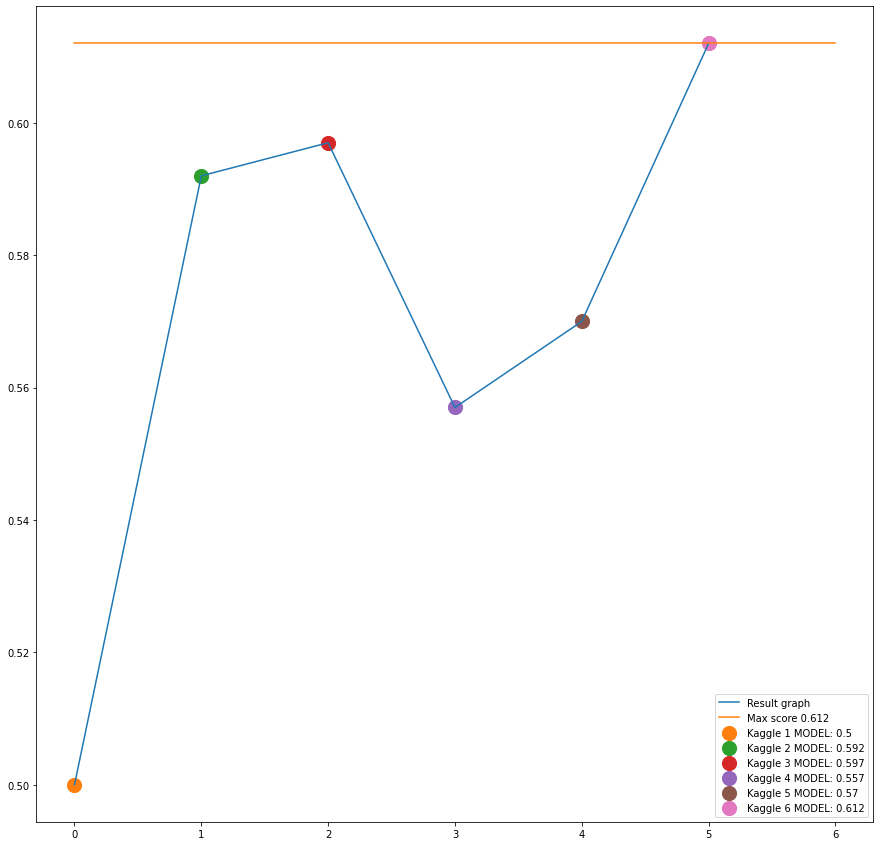

In [127]:
fig, ax = plt.subplots(figsize = (15,15))

y = [0.5, 0.592, 0.597, 0.557, 0.57, 0.612]

ax = plt.scatter(np.arange(0,6), y)

for ind in range(len(y)):
    ax = plt.scatter(ind, y[ind], s = 200, label = f'Kaggle {ind + 1} MODEL: {y[ind]}')
ax = plt.plot(np.arange(0,6), y, label = 'Result graph')
ax = plt.plot([0, 6], [0.612, 0.612], label = 'Max score 0.612')
    
#     ax = plt.scatter((ind + 1), notebook_score[ind], s = 200,label = f'My {ind}: {notebook_score[ind]}')

plt.legend()
plt.show()